In [33]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

pd.__version__

'1.3.5'

In [2]:
## Load up the data -- this will take a couple seconds
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp_raw = pd.read_csv(url, parse_dates=["Date"])

In [3]:
unemp_raw.head()

,Date,state,LaborForce,UnemploymentRate
0,2000-01-01,Alabama,2142945.0,4.7
1,2000-01-01,Alaska,319059.0,6.3
2,2000-01-01,Arizona,2499980.0,4.1
3,2000-01-01,Arkansas,1264619.0,4.4
4,2000-01-01,California,16680246.0,5.0
...,...,...,...,...
10795,2017-12-01,Virginia,4318483.0,3.6
10796,2017-12-01,Washington,3754871.0,4.7
10797,2017-12-01,West Virginia,781852.0,5.4
10798,2017-12-01,Wisconsin,3158257.0,3.2


In [4]:
# Don't worry about the details here quite yet
unemp_all = (
    unemp_raw
    .reset_index()
    .pivot_table(index="Date", columns="state", values="UnemploymentRate")
)
unemp_all.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,4.7,6.3,4.1,4.4,5.0,2.8,2.8,3.5,3.7,3.7,...,2.4,3.7,4.6,3.1,2.7,2.6,4.9,5.8,3.2,4.1
2000-02-01,4.7,6.3,4.1,4.3,5.0,2.8,2.7,3.6,3.7,3.6,...,2.4,3.7,4.6,3.1,2.6,2.5,4.9,5.6,3.2,3.9
2000-03-01,4.6,6.3,4.0,4.3,5.0,2.7,2.6,3.6,3.7,3.6,...,2.4,3.8,4.5,3.1,2.6,2.4,5.0,5.5,3.3,3.9
2000-04-01,4.6,6.3,4.0,4.3,5.1,2.7,2.5,3.7,3.7,3.7,...,2.4,3.8,4.4,3.1,2.7,2.4,5.0,5.4,3.4,3.8
2000-05-01,4.5,6.3,4.0,4.2,5.1,2.7,2.4,3.7,3.7,3.7,...,2.4,3.9,4.3,3.2,2.7,2.3,5.1,5.4,3.5,3.8


In [5]:
states = [
    "Arizona", "California", "Florida", "Illinois",
    "Michigan", "New York", "Texas"
]
unemp = unemp_all[states]
unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


# Exercise 1
Looking at the displayed DataFrame above, can you identify the index? The columns?

You can use the cell below to verify your visual intuition.



In [6]:
unemp.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)

In [7]:
unemp.columns

Index(['Arizona', 'California', 'Florida', 'Illinois', 'Michigan', 'New York',
       'Texas'],
      dtype='object', name='state')

# Exercise 2
Do the following exercises in separate code cells below:

At each date, what is the minimum unemployment rate across all states in our sample?

What was the median unemployment rate in each state?

What was the maximum unemployment rate across the states in our sample? What state did it happen in? In what month/year was this achieved?

Classify each state as high or low volatility based on whether the variance of their unemployment is above or below 4.

In [8]:
# At each date, what is the minimum unemployment rate across all states in our sample?
unemp_raw.groupby('Date')['UnemploymentRate'].min()


Date
2000-01-01    2.4
2000-02-01    2.4
2000-03-01    2.4
2000-04-01    2.4
2000-05-01    2.3
             ... 
2017-08-01    2.2
2017-09-01    2.2
2017-10-01    2.1
2017-11-01    2.1
2017-12-01    2.1
Name: UnemploymentRate, Length: 216, dtype: float64

In [9]:
# What was the median unemployment rate in each state?
unemp_raw.groupby('state')['UnemploymentRate'].median()


state
Alabama           5.90
Alaska            7.00
Arizona           5.80
Arkansas          5.50
California        6.50
Colorado          5.20
Connecticut       5.30
Delaware          4.50
Florida           5.35
Georgia           5.30
Hawaii            4.10
Idaho             5.00
Illinois          6.15
Indiana           5.30
Iowa              4.20
Kansas            4.90
Kentucky          5.70
Louisiana         6.10
Maine             4.80
Maryland          4.40
Massachusetts     5.10
Michigan          7.00
Minnesota         4.50
Mississippi       6.60
Missouri          5.50
Montana           4.60
Nebraska          3.60
Nevada            5.65
New Hampshire     3.80
New Mexico        6.00
New York          5.70
New jersey        5.40
North Carolina    5.90
North Dakota      3.20
Ohio              5.80
Oklahoma          4.60
Oregon            6.85
Pennsylvania      5.45
Rhode island      5.40
South Carolina    6.60
South Dakota      3.40
Tennessee         5.60
Texas             5.40
Utah 

In [10]:
# What was the maximum unemployment rate across the states in our sample?
# What state did it happen in? In what month/year was this achieved?

max_unemployment = unemp_raw['UnemploymentRate'].max()
max_unemployment_state = unemp_raw[unemp_raw['UnemploymentRate'] == max_unemployment]['state'].iloc[0]
max_unemployment_date = unemp_raw[unemp_raw['UnemploymentRate'] == max_unemployment]['Date'].iloc[0]

print("Max Unemployment:", max_unemployment)
print("Max Unemployment State:", max_unemployment_state)
print("Max Unemployment Date:", max_unemployment_date)


Max Unemployment: 14.6
Max Unemployment State: Michigan
Max Unemployment Date: 2009-06-01 00:00:00


In [11]:
# Classify each state as high or low volatility based on whether the variance
# of their unemployment is above or below 4.

state_volatility = unemp_raw.groupby('state')['UnemploymentRate'].var()
state_volatility = state_volatility.apply(lambda x: 'High' if x > 4 else 'Low')
state_volatility

state
Alabama           High
Alaska             Low
Arizona           High
Arkansas           Low
California        High
Colorado           Low
Connecticut        Low
Delaware           Low
Florida           High
Georgia           High
Hawaii             Low
Idaho              Low
Illinois           Low
Indiana           High
Iowa               Low
Kansas             Low
Kentucky           Low
Louisiana          Low
Maine              Low
Maryland           Low
Massachusetts      Low
Michigan          High
Minnesota          Low
Mississippi        Low
Missouri           Low
Montana            Low
Nebraska           Low
Nevada            High
New Hampshire      Low
New Mexico         Low
New York           Low
New jersey         Low
North Carolina    High
North Dakota       Low
Ohio               Low
Oklahoma           Low
Oregon            High
Pennsylvania       Low
Rhode island      High
South Carolina    High
South Dakota       Low
Tennessee          Low
Texas              Low
Utah 

# Exercise 3

Imagine that we want to determine whether unemployment was high (> 6.5), medium (4.5 < x <= 6.5), or low (<= 4.5) for each state and each month.

Write a Python function that takes a single number as an input and outputs a single string noting if that number is high, medium, or low.

Pass your function to applymap (quiz: why applymap and not agg or apply?) and save the result in a new DataFrame called unemp_bins.

(Challenging) This exercise has multiple parts:

Use another transform on unemp_bins to count how many times each state had each of the three classifications.

Construct a horizontal bar chart of the number of occurrences of each level with one bar per state and classification (21 total bars).

(Challenging) Repeat the previous step, but count how many states had each classification in each month. Which month had the most states with high unemployment? What about medium and low?

In [12]:
# Part 1: Write a Python function to classify unemployment levels.
def classify_unemployment(unemployment):
    if unemployment > 6.5:
        return 'High'
    elif unemployment > 4.5:
        return 'Medium'
    else:
        return 'Low'


In [13]:
# Part 2: Pass your function from part 1 to applymap

unemp_bins = unemp.applymap(classify_unemployment)
unemp_bins

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,Low,Medium,Low,Low,Low,Medium,Medium
2000-02-01,Low,Medium,Low,Low,Low,Medium,Medium
2000-03-01,Low,Medium,Low,Low,Low,Medium,Low
2000-04-01,Low,Medium,Low,Low,Low,Medium,Low
2000-05-01,Low,Medium,Low,Low,Low,Medium,Low
...,...,...,...,...,...,...,...
2017-08-01,Medium,Medium,Low,Medium,Medium,Medium,Low
2017-09-01,Medium,Low,Low,Medium,Medium,Medium,Low
2017-10-01,Medium,Low,Low,Medium,Medium,Medium,Low


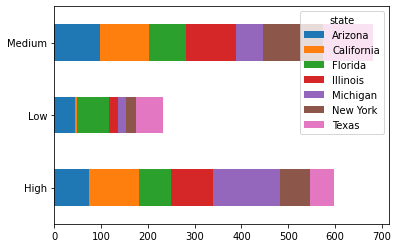

In [14]:
# Part 3: Count the number of times each state had each classification.

counts = unemp_bins.apply(pd.value_counts)
counts = counts.fillna(0)

counts.plot(kind='barh', stacked=True)


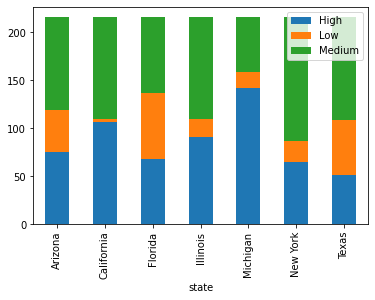

In [22]:
state_counts = unemp_bins.transpose().apply(pd.value_counts, axis=1)
state_counts = state_counts.fillna(0)

state_counts.plot(kind='bar', stacked=True)

In [39]:
# Part 4: Apply the same transform from part 4, but to each date instead of to each state.

monthly_counts = unemp_bins.transpose()
monthly_counts_fillna = monthly_counts.apply(pd.value_counts).transpose().fillna(0)
monthly_counts_fillna

,High,Low,Medium
Date,,,
2000-01-01,0.0,4.0,3.0
2000-02-01,0.0,4.0,3.0
2000-03-01,0.0,5.0,2.0
2000-04-01,0.0,5.0,2.0
2000-05-01,0.0,5.0,2.0
...,...,...,...
2017-08-01,0.0,2.0,5.0
2017-09-01,0.0,3.0,4.0
2017-10-01,0.0,3.0,4.0


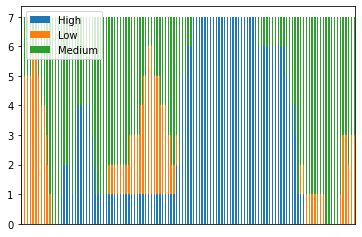

In [40]:
# bar chart
monthly_counts_fillna.plot(kind='bar', stacked=True)
plt.xticks([])  # disable x-axis ticks
plt.xlabel('')  # remove x-axis label
plt.show()

In [55]:
# count how many states had each classification in each month
months_with_all = monthly_counts.apply(pd.value_counts).transpose().dropna().shape[0] 
months_with_all

48

In [64]:
# Which month had the most states with high unemployment?
high_unemp_month = monthly_counts.apply(pd.value_counts).transpose() 
high_unemp_month[high_unemp_month['High'] == 7]['High']

Date
2009-04-01    7.0
2009-05-01    7.0
2009-06-01    7.0
2009-07-01    7.0
2009-08-01    7.0
2009-09-01    7.0
2009-10-01    7.0
2009-11-01    7.0
2009-12-01    7.0
2010-01-01    7.0
2010-02-01    7.0
2010-03-01    7.0
2010-04-01    7.0
2010-05-01    7.0
2010-06-01    7.0
2010-07-01    7.0
2010-08-01    7.0
2010-09-01    7.0
2010-10-01    7.0
2010-11-01    7.0
2010-12-01    7.0
2011-01-01    7.0
2011-02-01    7.0
2011-03-01    7.0
2011-04-01    7.0
2011-05-01    7.0
2011-06-01    7.0
2011-07-01    7.0
2011-08-01    7.0
2011-09-01    7.0
2011-10-01    7.0
2011-11-01    7.0
2011-12-01    7.0
2012-01-01    7.0
2012-02-01    7.0
2012-03-01    7.0
2012-04-01    7.0
2012-05-01    7.0
2012-06-01    7.0
2012-07-01    7.0
2012-08-01    7.0
Name: High, dtype: float64

In [65]:
# What about medium and low?
# medium

medium_unemp_month = monthly_counts.apply(pd.value_counts).transpose() 
medium_unemp_month[medium_unemp_month['Medium'] == 7]['Medium']

Date
2001-09-01    7.0
2001-10-01    7.0
2001-11-01    7.0
2001-12-01    7.0
2002-01-01    7.0
2016-05-01    7.0
2016-06-01    7.0
2016-07-01    7.0
2016-08-01    7.0
2016-09-01    7.0
2016-10-01    7.0
2016-11-01    7.0
2016-12-01    7.0
2017-01-01    7.0
Name: Medium, dtype: float64

In [71]:
# Low
# Since there's no month with all states we changed to 6!
Low_unemp_month = monthly_counts.apply(pd.value_counts).transpose() 
Low_unemp_month[Low_unemp_month['Low'] == 6]['Low']

Date
2000-08-01    6.0
2000-09-01    6.0
2000-10-01    6.0
2000-11-01    6.0
Name: Low, dtype: float64

# Exercise 4
For a single state of your choice, determine what the mean unemployment is during “Low”, “Medium”, and “High” unemployment times (recall your unemp_bins DataFrame from the exercise above).

Think about how you would do this for all the states in our sample and write your thoughts… We will soon learn tools that will greatly simplify operations like this that operate on distinct groups of data at a time.

Which states in our sample performs the best during “bad times?” To determine this, compute the mean unemployment for each state only for months in which the mean unemployment rate in our sample is greater than 7.

In [132]:
# Select the state of your choice: California
# find the frequncy of each unemployment state
cal = unemp_bins['California']
cal = pd.DataFrame({'month':cal.index, 'unemp_state':cal.values})
cal = pd.get_dummies(cal,columns=['unemp_state'])
print('Portion of occurance for High, Meduimm, and Low unemployments in California are:',cal['unemp_state_High'].mean(),',',cal['unemp_state_Medium'].mean(),',',cal['unemp_state_Low'].mean())

Portion of occurance for High, Meduimm, and Low unemployments in California are: 0.49074074074074076 , 0.49074074074074076 , 0.018518518518518517


In [125]:
# High mean
cal = unemp['California'].transpose()
cal = pd.DataFrame({'month':cal.index, 'unemp_level':cal.values})
cal[cal['unemp_level'] > 6.5].mean()
# California is a tough state for unemployment regarding the intensity and portion!

<ipython-input-125-b73fd15f51cf>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  cal[cal['unemp_level'] > 6.5].mean()


unemp_level    9.249057
dtype: float64

In [126]:
# Medium mean
cal[(cal['unemp_level'] <= 6.5) & (cal['unemp_level'] > 4.5)].mean()

<ipython-input-126-e0ccf54c1e8a>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  cal[(cal['unemp_level'] <= 6.5) & (cal['unemp_level'] > 4.5)].mean()


unemp_level    5.454717
dtype: float64

In [131]:
# Low mean
cal = cal.dropna()
cal[cal['unemp_level'] <= 4.5].mean()

<ipython-input-131-50073aed80b5>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  cal[cal['unemp_level'] <= 4.5].mean()


unemp_level    4.5
dtype: float64

In [145]:
# All states
# mean High
x = unemp.transpose()
x[x > 6.5].mean(1)

state
Arizona       8.733333
California    9.249057
Florida       9.155882
Illinois      8.740659
Michigan      8.762676
New York      8.169231
Texas         7.552941
dtype: float64

In [148]:
# mean Medium

x[(x <= 6.5) & (x > 4.5)].mean(1)

state
Arizona       5.436082
California    5.454717
Florida       5.331646
Illinois      5.618868
Michigan      5.407018
New York      5.361240
Texas         5.567290
dtype: float64

In [149]:
# mean Low

x[x <= 4.5].mean(1)

state
Arizona       4.063636
California    4.500000
Florida       3.807246
Illinois      4.352632
Michigan      3.876471
New York      4.340909
Texas         4.298276
dtype: float64

In [150]:
# during bad times!
x[x > 7].mean(1)

state
Arizona        9.038462
California    10.234211
Florida        9.568966
Illinois       9.423529
Michigan       9.465385
New York       8.286667
Texas          7.972727
dtype: float64

During bad times, Texas does the best!!!!